# Preprocessing OASIS1

In [1]:
# IMPORTS
# DATA MANIPULATION
import pandas as pd
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import set_config; set_config(display='diagram') # Visualize pipelines in HTML
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

# MACHINE LEARNING
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [2]:
# Importing Data
oasis1_cs_path = '../raw_data/OASIS1/oasis_cross-sectional.csv'
oasis1 = pd.read_csv(oasis1_cs_path)

In [3]:
# Check shape
oasis1.shape

(436, 12)

Note to self:


**CDR;** 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia

**eTIV;** Estimated total intracranial volume (eTIV)

**nWBV** Normalized whole brain volume

**ASF;** Atlas scaling factor

In [4]:
oasis1.sample(20)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
96,OAS1_0104_MR1,F,R,24,NaN,NaN,NaN,NaN,1447,0.841,1.213,NaN
38,OAS1_0042_MR1,M,R,80,4.0,2.0,29.0,0.5,1854,0.709,0.947,NaN
129,OAS1_0139_MR1,F,R,72,3.0,3.0,28.0,0.0,1512,0.779,1.161,NaN
159,OAS1_0173_MR1,M,R,35,NaN,NaN,NaN,NaN,1475,0.829,1.190,NaN
381,OAS1_0421_MR1,F,R,22,NaN,NaN,NaN,NaN,1655,0.847,1.061,NaN
330,OAS1_0366_MR1,F,R,45,5.0,2.0,29.0,0.0,1549,0.813,1.133,NaN
288,OAS1_0318_MR1,M,R,33,NaN,NaN,NaN,NaN,1634,0.836,1.074,NaN
69,OAS1_0074_MR1,M,R,43,4.0,NaN,30.0,0.0,1547,0.847,1.134,NaN
143,OAS1_0155_MR1,M,R,71,4.0,NaN,28.0,0.5,1359,0.753,1.291,NaN
389,OAS1_0430_MR1,M,R,71,4.0,1.0,17.0,1.0,1562,0.687,1.123,NaN


## Data Cleaning

In [5]:
def preprocess_data(oasis1):
    """This function removes CDR rows containing NANs, 
    fills SES missing values with status 3,
    encodes Male/Female M/F to 1 and 0,
    and drops columns Delay and Hand."""
    
    oasis1.dropna(subset = ["CDR"], inplace=True)
    oasis1['SES'].fillna(value=3, inplace=True) # Socioeconomic status 3 means that participants went to 'some college'
    oasis1['M/F'].replace({'F':0, 'M':1}, inplace = True) # Replaces M with 1 and Female with 0
    oasis1.drop('Delay', inplace=True, axis=1)
    oasis1.drop('Hand', inplace=True, axis=1)
    
    return oasis1

In [6]:
preprocess_data(oasis1)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,0,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,OAS1_0454_MR1,0,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,OAS1_0455_MR1,0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,OAS1_0456_MR1,1,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [7]:
# Check shape again
oasis1.shape

(235, 10)

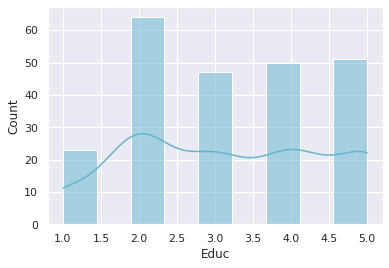

In [8]:
# Education is not normally distrbuted
sns.histplot(oasis1.Educ,kde = True, color = 'c');

In [9]:
# Check whether NANs are still here
oasis1.CDR.unique()

array([0. , 0.5, 1. , 2. ])

In [10]:
# Check SES column
oasis1.SES.unique()

array([3., 1., 2., 4., 5.])

In [11]:
# Check M/F column
oasis1['M/F']

0      0
1      0
2      0
8      1
9      0
      ..
411    0
412    0
413    0
414    1
415    0
Name: M/F, Length: 235, dtype: int64

In [12]:
# def gender_encoding(i):
#     """This function returns 0 for F and 1 for M"""
#     return i.map({'F':0, 'M':1})

## Preprocessing data

In [13]:
# Defining variables
X = oasis1.drop(columns = ['CDR', 'ID'])
y = oasis1['CDR']

In [14]:
# Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Preprocessing pipeline

 Note: columns **nWBV and ASF** already normalized
 
**Columns to scale:**

Standard Scale: age

Robust Scale: eTIV, MMSE

MinMax Scale: Educ

In [15]:
# transformer for numerical features

def numerical_transformer():
    """This function transforms all numerical features according to their respective scalers
    """
    standard_features = ['Age']
    robust_features = ['eTIV', 'MMSE']
    minmax_features = ['Educ']
    numeric_transformer = ColumnTransformer([
        ('standard_scaler', StandardScaler(), standard_features),
        ('robust_scaler', RobustScaler(), robust_features),
        ('minmax_scaler', MinMaxScaler(), minmax_features),
         ], remainder = 'passthrough')
    
    return numeric_transformer
numeric_transformer = numerical_transformer()
numeric_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scaler', StandardScaler(), ['Age']),
                                ('robust_scaler', RobustScaler(),
                                 ['eTIV', 'MMSE']),
                                ('minmax_scaler', MinMaxScaler(), ['Educ'])])

In [16]:
# transformer for categorical features

categorical_features = ['M/F']
def categorical_transformer():
    """This function encodes all categorical features according to their respective encoder.
    """
    categorical_transformer = ColumnTransformer([
        ('label_encoder', LabelEncoder(), categorical_features)
    ])
    return categorical_transformer
category_transformer = categorical_transformer()

In [17]:
def set_pipeline():
    """This function returns a pipeline
    """
    preproc = Pipeline([('numericals', numeric_transformer)])
    return preproc
set_pipeline()

Pipeline(steps=[('numericals',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(), ['Age']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['eTIV', 'MMSE']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['Educ'])]))])

In [18]:
def preproc_df():
    """This function returns a scaled dataframe ready for processing
    """
    # Instantiating pipeline
    pipeline = set_pipeline()
    oasis1_scaled = pd.DataFrame(pipeline.fit_transform(X_train, y_train), columns = set_pipeline().get_feature_names_out())
    oasis1_scaled.rename(columns={
                                 'remainder__M/F': 'M/F',
                                 'remainder__SES': 'SES',
                                 'remainder__nWBV': 'nWBV',
                                 'remainder__ASF': 'ASF',
                                 'standard_scaler__Age': 'Age',
                                 'robust_scaler__eTIV': 'eTIV',
                                 'robust_scaler__MMSE': 'MMSE',
                                 'minmax_scaler__Educ': 'Educ'
    }, inplace=True)
    oasis1_scaled = oasis1_scaled[["M/F", "Age", "Educ", "SES", "MMSE", "eTIV", "nWBV", "ASF"]]
    return oasis1_scaled
preproc_df()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0.0,0.001442,0.75,3.0,-0.25,0.034783,0.708,1.207
1,0.0,0.001442,0.75,2.0,0.25,-1.609938,0.790,1.563
2,1.0,-0.167764,0.25,4.0,-2.00,0.069565,0.727,1.202
3,0.0,0.339855,0.25,4.0,-1.50,-0.481988,0.736,1.300
4,0.0,0.762870,1.00,1.0,0.00,0.327950,0.742,1.160
...,...,...,...,...,...,...,...,...
171,1.0,0.678267,0.00,4.0,0.00,1.505590,0.676,1.003
172,0.0,0.001442,0.25,2.0,-2.25,-0.859627,0.745,1.377
173,0.0,-0.506177,0.25,3.0,-2.50,1.023602,0.693,1.062
174,0.0,-0.167764,0.50,4.0,0.25,-0.909317,0.818,1.388


# Decision Tree

In [19]:
# Defining new X_scaled
X_scaled = preproc_df()

# Making a copy of X_scaled
X_scaled_test = X_scaled.copy()
X_scaled_test = X_scaled_test[["M/F", "Age"]]

In [20]:
y_train.unique()
#y_train.replace({0: 'nondemented', 0.5: 'verymild', 1: 'mild', 2: 'moderate'})

array([0.5, 0. , 1. , 2. ])

In [21]:
# Instantiate Decision Tree
tree_clf = DecisionTreeClassifier(max_depth = 10)

In [30]:
tree_clf.fit(X_scaled_test,y_train_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf,
              feature_names = X_train.columns,
              labels = y.unique())